<a href="https://colab.research.google.com/github/two-phaseflow/JAR513M/blob/main/Week2_GroupAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **JAR513 Week 2 - Group Assignment**

Welcome to the Week 2 Group Assignment: “Geology, Reserves & Production Modeling.” This notebook guides you through data wrangling, plotting, and fitting simple logistic (Hubbert-style) curves to historical production data. You'll analyze fossil fuels and uranium, compare production trends, and reflect on how geology, efficiency, and policy intersect with resource dynamics.

# An Introduction to Python



Python is a programming language that is widely used in science and engineering because it is:
*   Readable (the code looks a lot like English)
*   Flexible (used for data analysis, modeling, machine learning, web apps, etc.)
*   Open-source (free, with many libraries contributed by the scientific community)

In this notebook, we'll mostly use Python as a data analysis and plotting tool.



# Why import libraries?

Python by itself is powerful, but to do specialized tasks (like plotting graphs or handling data tables) we use libraries.
*   Think of libraries as "toolboxes" we can load into Python.
*   Each toolbox contains functions we can use without reinventing them.

For example:
*   `pandas` -> tools for handling data tables (like Excel in Python)
*   `numpy` -> numerical tools for arrays and math
*   `matplotlib` -> tools for making plots and figures
*   `scipy` -> scientific functions, like curve fitting


# Example

In [2]:
import pandas as pd # load the "pandas" toolbox, give it a short nickname 'pd'
import numpy as np # numerical tools
import matplotlib.pyplot as plt # plotting tools

Now, instead of writing everything from scratch, we can call these ready-made functions. For example, `np.sqrt(9)` will give the square root of 9.

# Reading in data with `pandas`

Now we are ready to read in our dataset. In Google Colab, files don’t automatically “live” inside the notebook; we first need to upload them to the session. On the left-hand panel, click the folder icon (“Files”), then the upload button, and choose your CSV file (e.g., `unobtanium_production_data.csv`). Once uploaded, Colab will store the file temporarily for this session. If you close and reopen the notebook later, you’ll need to upload it again. Next we’ll use `pandas` to read our dataset into a **DataFrame** (a table, like in Excel, but inside Python).

In [3]:
df = pd.read_csv("unobtanium_production_data.csv", skiprows=1)

*   `read_csv` is a function inside of the pandas library that reads a CSV (comma-seaparated values) file
*   `"unobtanium_production_data.csv"`is the file name
*   `skiprows=1` tells pandas to skip the very first row in the file, since that row contains background notes, not actual data.

After loading, our data is stored in the variable `df`, which is a pandas DataFrame. To quickly check that the data imported correctly, we can take a quick look at the first five rows with:



In [4]:
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Zentopia,13,15,18,23,26,33,40,42,49,...,133,125,96,91,78,65,52,46,40,32
1,Fictonia,75,103,131,144,165,170,220,228,199,...,253,255,249,218,184,178,172,134,121,95
2,Imaginaria,12,10,12,11,10,11,11,11,10,...,142,149,148,149,167,196,203,211,222,241
3,Pseudoland,410,368,337,296,273,256,256,292,294,...,179,186,195,182,194,198,172,167,150,131
4,Mythshire,174,170,204,188,199,228,211,213,232,...,421,462,495,513,487,535,549,502,482,485


This command shows us the first 5 rows of the table, helping us check that the data imported correctly. Notice that the data is in *wide format*: each year is a separate column, each country a separate row.
For analysis and plotting, it's usually easier to work with long (or tidy) format, where each row is a single observation:
*   one column for the country
*   one column for the year
*   one column for the production value

We can reshape the data using the `melt` function:

In [6]:
df_long = df.melt(id_vars="Country", var_name="Year", value_name="Production")
df_long.head()

,Country,Year,Production
0,Zentopia,1970,13
1,Fictonia,1970,75
2,Imaginaria,1970,12
3,Pseudoland,1970,410
4,Mythshire,1970,174


Now the data is tidy, and each row corresponds to *Country-Year-Production*.

# Cleaning the data

Before we analyze or plot, we should make sure the data is in the correct format:

In [12]:
df_long["Year"] = df_long["Year"].astype(int)
df_long["Production"] = pd.to_numeric(df_long["Production"], errors="coerce")

*   `astype(int)` makes sure that the year is stored as an integer
*   `pd.to_numeric(..., errors="coerce")` ensures production is treated as a number. If anything can't be converted, it becomes `NaN` (missing data).



# Plotting country production

Now that our dataset is in tidy format, we can start exploring it with plots.
The following code will make a line plot for each country in our dataset:

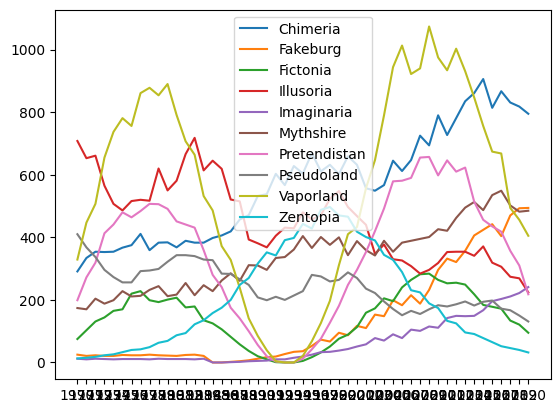

In [7]:
for country, subset in df_long.groupby("Country"):
    plt.plot(subset["Year"], subset["Production"], label=country)
plt.legend()
plt.show()

What's happening here?
*   `df_long.groupby("Country")` splits the data into smaller tables, one for each country.
*   The `for` loop goes through each of those smaller tables, saving the country name in `country` and the corresponding rows in `subset`.
*   Inside the loop, `plt.plot(...)` draws a line of production vs. year for that country. The order of arguments is important: the `subset["Year"]` column is shown on the X-axis, and the `subset["Production"]` column shown on the Y-axis.
*   `plt.legend()` adds a key showing which line belong to which country.
*   Finally, `plt.show()` displays the figure.

This is your first look at a loop: instead of writing out one plot command per country, the loop automates it, repeating the same action for each group in the data.

